## Домашнее задание к уроку № 9.<br>
## Инструменты разметки наборов данных

### Задание 1.<br>
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

### Задание 2.<br>
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

### Задача 3.<br>
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

### Задача 4.<br>
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

### Задача 5.<br>
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

### Задача 6.<br>
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Задание 1.<br>
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Т.к. я - биоинформатик, то я выбрал набор данных из своей работы - это данные измерений морфо-анатомических, физиологических и биохимических показателей 12000 пациентов-мужчин из российской популяции в возрасте от 37 до 74 лет с бессимптомным течением атеросклероза.<br>
Для каждого пациента были измерены эти показатели на следующих этапах исследования: в начале исследования, через 3 месяца исследования, через 6 месяцев исследования, через 9 месяцев исследования и через 12 месяцев исследования.

In [3]:
#### Получение полного пути до файла с данными

FileNameFull = "atherosclerosis_dataset.xlsx"
print(FileNameFull)

#### Чтение файла Excel с данными
input_df = pd.read_excel(FileNameFull, engine='openpyxl')
input_df

atherosclerosis_dataset.xlsx


,valid,age,sys,dia,sm,inf,an,cho,tg,hdl,...,d_atg_r,AMI_risk,CHD_risk,VAR00002,atherosclerosis type month 0,atherosclerosis type month 3,atherosclerosis type month 6,atherosclerosis type month 9,atherosclerosis type month 12,age_group
0,1.000000,56,130,80,0,0,1,238.000000,181.000000,35.500000,...,NaN,7.800000,17.000000,1,normal,normal,normal,normal,normal,middle
1,1.000000,63,140,90,0,1,0,189.000000,203.000000,29.400000,...,-36.111111,8.000000,22.700000,1,normal,normal,at risk,normal,normal,middle
2,1.000000,49,120,80,1,1,1,284.000000,226.000000,31.400000,...,-20.622568,12.900000,23.000000,1,at risk,atherosclerosis,atherosclerosis,atherosclerosis,at risk,middle
3,1.000000,62,130,80,1,0,0,218.000000,265.000000,53.800000,...,-11.061947,5.500000,18.700000,1,normal,normal,at risk,normal,normal,middle
4,1.000000,57,120,80,0,0,0,154.000000,89.000000,52.800000,...,22.000000,1.000000,5.400000,1,at risk,at risk,at risk,at risk,at risk,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1.019382,37,110,70,1,1,0,214.000060,295.254327,31.569550,...,34.708181,1.681898,8.714630,0,normal,at risk,at risk,at risk,normal,low
11996,1.029241,37,110,70,1,1,0,225.359522,289.244412,27.966268,...,36.916634,1.621065,7.940207,0,normal,at risk,at risk,at risk,normal,low
11997,0.929817,37,110,70,1,1,0,259.026246,268.780057,30.433315,...,34.298281,1.815233,9.956535,0,normal,at risk,at risk,at risk,normal,low
11998,0.845250,37,110,70,1,1,0,219.149244,323.959319,38.693567,...,34.278444,1.879601,10.194996,0,normal,at risk,at risk,at risk,normal,low


Цель данных исследований (и существования набора данных) - создать модель, прогнозирующую возникновение и развитие атеросклероза у пациента на основании биохимического анализа крови. Для этого на каждом из этих этапов для каждого пациента был определен статус здоровья относительно атеросклероза: «норма», «предрасположенность», «атеросклероз».

### Задание 2.<br>
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Разметкой данного набора данных считается указание для каждого пациента (пациенту соответствует строка датасета) статуса здоровья относительно атеросклероза: норма (normal), предрасположенность (at risk), атеросклероз (atherosclerosis).<br>
В медицинской практике атеросклероз определяется на основании ультразвукового исследования (УЗИ) некоторых магистральных кровеносных сосудов. Значением «норма» относительно статута здоровья считались следующие значения толщинs интимо-медиального (срединного) слоя сонной артерии соответственно: у мужчин до 40 лет - 0,7 мм ±0,1 мм, для мужчин от 40 до 50 лет - 0,8 мм ±0,1 мм, старше 50 лет - 0,9 мм ±0,1 мм. 5. Для значения «атеросклероз» маркерными считались следующие значения толщины интимо-медиального слоя вне зависимости от возраста: 1,3 мм ±0,1 мм. Для значения «предрасположенность» маркерными считались значения толщины интимо-медиального слоя, промежуточные между «нормой» и «атеросклерозом».<br>

### В принципе, данный набор данных служит для моделирования сложных процессов поражения сосудистой стенки в зависимомти от биохимических реакций в организме человека, но мы для учебных целей будем автоматизировать простую механическую работу, которую делает любой врач УЗД - диагностирует атеросклероз на основании данных УЗИ артерий пациента.  

In [4]:
### Функция для разметки основанной на правилах
### age_column - возраст пациентов
### vs_column - толщина сонной артерии пациентов

def assign_category(row, age_column, vs_column):
    if row[age_column] < 40.0 and (row[vs_column] >= 0.6 and row[vs_column] <= 0.8):
        return 'normal'
    elif (row[age_column] >= 40.0 and row[age_column] <= 50) and row[vs_column] <= 0.9:
        return 'normal'
    elif row[age_column] > 50.0 and row[vs_column] <= 1.0:
        return 'normal'
    elif row[vs_column] >= 1.2:
        return 'atherosclerosis'
    elif row[vs_column] > 0.8 and row[vs_column] < 1.2:
        return 'at risk'
    else:
        return 'неизвестно'

### Дальнейшаяя работа проводится только на примере показателей, измеренных к пациентов в ПЕРВЫЙ месяц обследований

In [5]:
### Для решения задачи разметки нужно убедиться что для всех пациентов заполнены поля
# с возрастом и с измерением толщины сонной артерии в первый месяц исследования, т.е. обработать пропущенные значения,
# заполнив их среднеарифмитическими оценками

input_df[['age', 'vs0']].info()

### Вывод: все необходимые поля набора данных полностью заполнены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     12000 non-null  int64  
 1   vs0     12000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 187.6 KB


In [6]:
### Разметка набора данных для первого месяца обследования пациентов, основанная на правилах
### 'atherosclerosis type month 0' - поле статуса здоровья пациента по отношению к
### атеросклерозу при обследовании пациента в первый месяц

input_df['atherosclerosis type month 0'] = input_df.apply(assign_category, args=('age', 'vs0'), axis=1)

In [7]:
### Проверим - все ли пациенты были размечены по статусу атеросклероза
input_df['atherosclerosis type month 0'].value_counts()

### Вывод: переменная-отклик заполнена полностью

,count
atherosclerosis type month 0,
normal,5439
at risk,4793
atherosclerosis,1768


### Задача 3.<br>
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [8]:
### Выделим из общего набора данных необходимые данные для ручной разметки в отдельный файл

df = input_df[['age', 'vs0', 'atherosclerosis type month 0']]

FileNameFull = "atherosclerosis_dataset_manual.csv"

df.to_csv(FileNameFull, index = False)

### Разметку  для первых 50 пациентов (для учебных целей) я проводит в Label Studio.
#   Скриншот этой работы приложен в папку вместе с этим .ipynb файлом

### Задача 4.<br>
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [9]:
# Загрузка датасета с ручной разметкой
manual_df = pd.read_csv('atherosclerosis_dataset_manual.csv', engine='python')

### Объдиняем существующий датасет с датасетом с размещенными вручную значениями

df = pd.merge(input_df, manual_df, on = ['age', 'vs0'], how = 'inner')
df

,valid,age,sys,dia,sm,inf,an,cho,tg,hdl,...,AMI_risk,CHD_risk,VAR00002,atherosclerosis type month 0_x,atherosclerosis type month 3,atherosclerosis type month 6,atherosclerosis type month 9,atherosclerosis type month 12,age_group,atherosclerosis type month 0_y
0,1.000000,63,140,90,0,1,0,189.000000,203.000000,29.400000,...,8.000000,22.700000,1,normal,normal,at risk,normal,normal,middle,normal
1,1.000000,49,120,80,1,1,1,284.000000,226.000000,31.400000,...,12.900000,23.000000,1,atherosclerosis,atherosclerosis,atherosclerosis,atherosclerosis,at risk,middle,atherosclerosis
2,1.000000,62,130,80,1,0,0,218.000000,265.000000,53.800000,...,5.500000,18.700000,1,normal,normal,at risk,normal,normal,middle,normal
3,1.000000,57,120,80,0,0,0,154.000000,89.000000,52.800000,...,1.000000,5.400000,1,normal,at risk,at risk,at risk,at risk,middle,normal
4,1.000000,54,125,70,0,0,1,250.000000,233.000000,46.300000,...,4.000000,11.500000,1,normal,at risk,at risk,at risk,normal,middle,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10387,1.019382,37,110,70,1,1,0,214.000060,295.254327,31.569550,...,1.681898,8.714630,0,at risk,at risk,at risk,at risk,normal,low,at risk
10388,1.029241,37,110,70,1,1,0,225.359522,289.244412,27.966268,...,1.621065,7.940207,0,at risk,at risk,at risk,at risk,normal,low,at risk
10389,0.929817,37,110,70,1,1,0,259.026246,268.780057,30.433315,...,1.815233,9.956535,0,at risk,at risk,at risk,at risk,normal,low,at risk
10390,0.845250,37,110,70,1,1,0,219.149244,323.959319,38.693567,...,1.879601,10.194996,0,at risk,at risk,at risk,at risk,normal,low,at risk


In [10]:
### переименовываем столбец atherosclerosis type month 0_y в atherosclerosis type month 0

old_column_name = 'atherosclerosis type month 0_y'
new_column_name = 'atherosclerosis type month 0'
df.rename(columns={old_column_name: new_column_name}, inplace=True)

### Задача 5.<br>
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [11]:
# Перекодирование категориальной переменной
label_encoder = LabelEncoder()
df['atherosclerosis type month 0'] = label_encoder.fit_transform(df['atherosclerosis type month 0'])

In [12]:
# Разделение выборок на обучающую и тестовую
X = df[['age', 'vs0']].values
y = df['atherosclerosis type month 0'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
# Определяем простую модель ИНС прямого распространения
# с тремя слоями нейронов для двух входных переменных и
# трех выходов.

model = Sequential([
    Dense(10, input_dim=2, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/75
228/228 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3234 - loss: 5.3570 - val_accuracy: 0.6318 - val_loss: 0.8922
Epoch 2/75
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6042 - loss: 0.8795 - val_accuracy: 0.6876 - val_loss: 0.8444
Epoch 3/75
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6167 - loss: 0.8317 - val_accuracy: 0.5920 - val_loss: 0.7972
Epoch 4/75
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6216 - loss: 0.7980 - val_accuracy: 0.6046 - val_loss: 0.7575
Epoch 5/75
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6381 - loss: 0.7515 - val_accuracy: 0.5850 - val_loss: 0.7391
Epoch 6/75
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6391 - loss: 0.7216 - val_accuracy: 0.6065 - val_loss: 0.6943
Epoch 7/75
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6535 - loss: 0.6831 - val_accuracy: 0.5872 - val_loss: 0.6833
Epoch 8/75
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6513 - loss: 0.6607 - val_accuracy: 0.

### Задача 6.<br>
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

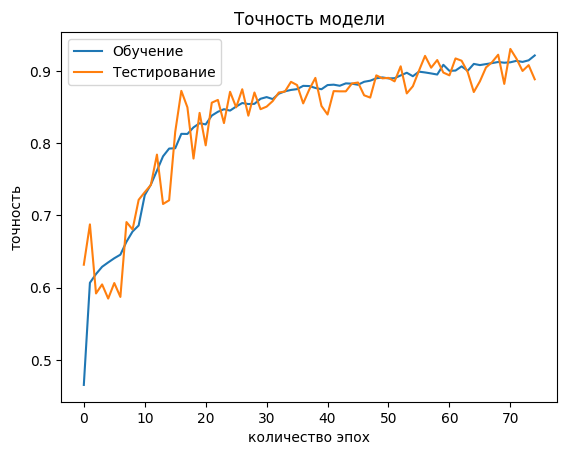

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper left')
plt.show()

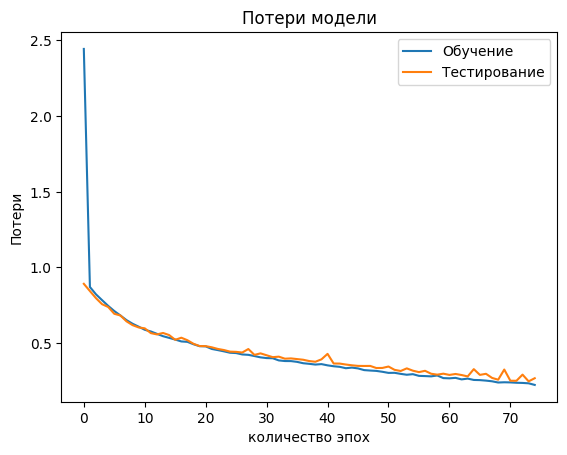

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper right')
plt.show()

In [18]:
# Расчет некоторых других метрик качества модели
loss, accuracy = model.evaluate(X_test, y_test)
y_test_predicted = np.argmax(model.predict(X_test), axis=1)
f1 = f1_score(y_test, y_test_predicted, average='weighted')
print(f'Test Loss (Потери): {loss},\nTest Accuracy (Точность): {accuracy}')
print(f'F-score = {f1}')

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8925 - loss: 0.2711
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Loss (Потери): 0.2687572240829468,
Test Accuracy (Точность): 0.8883900046348572
F-score = 0.8874116446663971


### Вывод: эффективность модели в решении задачи разметки при точности 89% можно считать хорошей.